# EDA on Crime Dataset (Spring 2023)
--------------------------------
**Dr. Dave Wanik - Department of Operations and Information Management - University of Connecticut**


Note: This assignment is used for OPIM 5641, 5502 and 5512 - if you are taking more than one of my classes, just submit this assignment for each respective class - thanks! 

Each question is 10 pts.

* **Your name here:** Hyun Kyoung Baik
* **Your student ID here:** hkb22001

You can ask your fellow classmates for help, but everyone must do their own work with lots of comments and text cells. Anyone who directly copies or allows their work to be directly copied gets a 0 on the assignment and final letter grade lowered by one letter.

If you are new to Python, this assignment might be tricky - come to office hours for help! I've left some old output printed so that you can check your work.

In [55]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Intro

Whenever I start a class off, I like to make sure that students have basic EDA chops in Python. This semester I picked a structured time series dataset from Wikipedia which tracks violent crime per State over a few years. This homework tests your skill at using data to tell a story about crime in the US. Good luck!

![crime map from Wiki](https://upload.wikimedia.org/wikipedia/commons/5/51/Violent_Crime_Rate_by_U.S._state.svg)

In [56]:
# read the data
df = pd.read_html('https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_violent_crime_rate')[0]
df.head()

State or Territory            2020                     \
     State or Territory Incidence Count Violent Crime Rate   
0                   NaN             NaN                NaN   
1  District of Columbia          7127.0              999.8   
2                Alaska          6126.0              837.8   
3            New Mexico         16393.0              778.3   
4             Tennessee         46328.0              672.7   

  Historical Violent Crime Rates                                         \
                            2019   2018    2017    2016    2015    2014   
0                            NaN    NaN     NaN     NaN     NaN     NaN   
1                         1045.2  997.1  1002.7  1203.5  1269.1  1242.6   
2                          865.0  891.7   856.7   804.6   730.2   635.5   
3                          824.0  842.8   778.6   699.4   656.1   597.7   
4                          598.9  630.4   655.0   638.5   612.1   610.7   

                           
     2013    2012    2011  
0     NaN     NaN     NaN  
1  1281.9  1241.8  1202.1  
2   602.6   604.1   606.5  
3   596.7   559.6   567.5  
4   579.7   638.5   608.2

This dataset is a bit dirty - let's clean it up!

# Q1. Collapse the multi-index
The index is really a double index with two layers - which in my experience is quite annoying in most cases. 

In [57]:
# look at this complicated multiIndex - yuck!
df.columns

MultiIndex([(            'State or Territory', 'State or Territory'),
            (                          '2020',    'Incidence Count'),
            (                          '2020', 'Violent Crime Rate'),
            ('Historical Violent Crime Rates',               '2019'),
            ('Historical Violent Crime Rates',               '2018'),
            ('Historical Violent Crime Rates',               '2017'),
            ('Historical Violent Crime Rates',               '2016'),
            ('Historical Violent Crime Rates',               '2015'),
            ('Historical Violent Crime Rates',               '2014'),
            ('Historical Violent Crime Rates',               '2013'),
            ('Historical Violent Crime Rates',               '2012'),
            ('Historical Violent Crime Rates',               '2011')],
           )

Read these articles then make a single set of sensible column names.
* https://stackoverflow.com/questions/14507794/how-to-flatten-a-hierarchical-index-in-columns
* https://stackoverflow.com/questions/19758364/rename-specific-columns-in-pandas

Like ['State', '2020_incidence_count', '2020_crime_rate', '2019_crime_rate', etc.]

In [58]:
# look at this nice index
df.columns = df.columns.droplevel(0)

In [59]:
df.head(5)

,State or Territory,Incidence Count,Violent Crime Rate,2019,2018,2017,2016,2015,2014,2013,2012,2011
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,District of Columbia,7127.0,999.8,1045.2,997.1,1002.7,1203.5,1269.1,1242.6,1281.9,1241.8,1202.1
2,Alaska,6126.0,837.8,865.0,891.7,856.7,804.6,730.2,635.5,602.6,604.1,606.5
3,New Mexico,16393.0,778.3,824.0,842.8,778.6,699.4,656.1,597.7,596.7,559.6,567.5
4,Tennessee,46328.0,672.7,598.9,630.4,655.0,638.5,612.1,610.7,579.7,638.5,608.2


In [60]:
# nice names for each column (you can manually rename each column)
# or use something like _add_suffix
df=df.rename(columns={"Incidence Count": "2020_Incidence Count",
                   "Violent Crime Rate": "2020_Violent Crime Rate",
                   "2019": "2019_Violent Crime Rate",
                   "2018": "2018_Violent Crime Rate",
                   "2017": "2017_Violent Crime Rate",
                   "2016": "2016_Violent Crime Rate",
                   "2015": "2015_Violent Crime Rate",
                   "2014": "2014_Violent Crime Rate",
                   "2013": "2013_Violent Crime Rate",
                   "2012": "2012_Violent Crime Rate",
                   "2011": "2011_Violent Crime Rate"
                   })

In [61]:
df.head(5)

,State or Territory,2020_Incidence Count,2020_Violent Crime Rate,2019_Violent Crime Rate,2018_Violent Crime Rate,2017_Violent Crime Rate,2016_Violent Crime Rate,2015_Violent Crime Rate,2014_Violent Crime Rate,2013_Violent Crime Rate,2012_Violent Crime Rate,2011_Violent Crime Rate
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,District of Columbia,7127.0,999.8,1045.2,997.1,1002.7,1203.5,1269.1,1242.6,1281.9,1241.8,1202.1
2,Alaska,6126.0,837.8,865.0,891.7,856.7,804.6,730.2,635.5,602.6,604.1,606.5
3,New Mexico,16393.0,778.3,824.0,842.8,778.6,699.4,656.1,597.7,596.7,559.6,567.5
4,Tennessee,46328.0,672.7,598.9,630.4,655.0,638.5,612.1,610.7,579.7,638.5,608.2


# Q2. What is the shape of the dataframe?
State the number of rows and number of columns.

In [62]:
df.shape

(54, 12)

***This dataframe has 54 rows and 12 columns***


# Q3. Count the number of missing values per column, then print a list of unique values for the State/territory column.

Read this:
* https://stackoverflow.com/questions/13413590/how-to-drop-rows-of-pandas-dataframe-whose-value-in-a-certain-column-is-nan

Now drop any rows where the 'State or Territory' column is nan.

In [63]:
df.isnull().sum()

State or Territory         1
2020_Incidence Count       1
2020_Violent Crime Rate    1
2019_Violent Crime Rate    1
2018_Violent Crime Rate    1
2017_Violent Crime Rate    1
2016_Violent Crime Rate    1
2015_Violent Crime Rate    1
2014_Violent Crime Rate    1
2013_Violent Crime Rate    1
2012_Violent Crime Rate    1
2011_Violent Crime Rate    1
dtype: int64

***Every column has one missing value, and the total number of  missing values from this dataset are 12***

In [64]:
df=df.dropna(subset=['State or Territory'])

In [65]:
df.head(5)

,State or Territory,2020_Incidence Count,2020_Violent Crime Rate,2019_Violent Crime Rate,2018_Violent Crime Rate,2017_Violent Crime Rate,2016_Violent Crime Rate,2015_Violent Crime Rate,2014_Violent Crime Rate,2013_Violent Crime Rate,2012_Violent Crime Rate,2011_Violent Crime Rate
1,District of Columbia,7127.0,999.8,1045.2,997.1,1002.7,1203.5,1269.1,1242.6,1281.9,1241.8,1202.1
2,Alaska,6126.0,837.8,865.0,891.7,856.7,804.6,730.2,635.5,602.6,604.1,606.5
3,New Mexico,16393.0,778.3,824.0,842.8,778.6,699.4,656.1,597.7,596.7,559.6,567.5
4,Tennessee,46328.0,672.7,598.9,630.4,655.0,638.5,612.1,610.7,579.7,638.5,608.2
5,Arkansas,20363.0,671.9,580.8,561.6,566.0,554.3,521.3,480.2,445.7,469.6,480.9


In [66]:
print(sorted(df['State or Territory'].unique()))

['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'United States', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']


Read this:
* https://stackoverflow.com/questions/19960077/how-to-filter-pandas-dataframe-using-in-and-not-in-like-in-sql

Now drop values where this column is equal to District of Columbia, United States or Puerto Rico. How many rows do you have now?

In [67]:
df_dr=df[(df["State or Territory"]=="District of Columbia") |(df["State or Territory"]=="United States") | (df["State or Territory"]=="Puerto Rico")].index

In [68]:
df=df.drop(df_dr)

In [69]:
df.shape

(50, 12)

***After drop the row of Districto of Columbia, United States, and Puerto Rico, the total number of row is 50***

# Q4. Which State had the highest and lowest crime rate in 2020?

You can either sort by high and low to show the tail, or you can select the row where the min and max 2020 rates exist. Do not just print the value of the min and max!

In [70]:
df.describe()

,2020_Incidence Count,2020_Violent Crime Rate,2019_Violent Crime Rate,2018_Violent Crime Rate,2017_Violent Crime Rate,2016_Violent Crime Rate,2015_Violent Crime Rate,2014_Violent Crime Rate,2013_Violent Crime Rate,2012_Violent Crime Rate,2011_Violent Crime Rate
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,26128.560000,387.422000,366.968000,369.844000,378.054000,377.982000,362.072000,346.582000,340.134000,355.406000,354.794000
std,32207.956456,158.952549,150.412832,156.725409,150.541231,147.271008,138.223236,126.549875,123.161317,128.395196,129.320922
min,1081.000000,108.600000,116.100000,112.000000,120.600000,124.000000,118.000000,102.600000,114.900000,122.400000,123.200000
25%,6378.750000,280.925000,262.025000,257.175000,252.450000,246.550000,256.500000,259.625000,247.025000,254.450000,249.000000
50%,17639.000000,373.700000,344.850000,345.550000,361.150000,372.950000,348.300000,328.400000,327.050000,334.300000,340.800000
75%,32464.750000,457.350000,438.025000,451.250000,456.300000,459.500000,425.225000,424.225000,421.025000,451.050000,442.650000
max,174026.000000,837.800000,865.000000,891.700000,856.700000,804.600000,730.200000,635.700000,602.600000,638.500000,608.200000


In [71]:
df.loc[[df['2020_Violent Crime Rate'].idxmin()]]


,State or Territory,2020_Incidence Count,2020_Violent Crime Rate,2019_Violent Crime Rate,2018_Violent Crime Rate,2017_Violent Crime Rate,2016_Violent Crime Rate,2015_Violent Crime Rate,2014_Violent Crime Rate,2013_Violent Crime Rate,2012_Violent Crime Rate,2011_Violent Crime Rate
52,Maine,1466.0,108.6,116.1,112.0,120.6,124.0,130.1,127.6,121.6,122.4,123.2


***The minimum crime rate in 2020 is 108.6, and Maine is the state which has the lowest crime rate.***

In [72]:
df.loc[[df['2020_Violent Crime Rate'].idxmax()]]

,State or Territory,2020_Incidence Count,2020_Violent Crime Rate,2019_Violent Crime Rate,2018_Violent Crime Rate,2017_Violent Crime Rate,2016_Violent Crime Rate,2015_Violent Crime Rate,2014_Violent Crime Rate,2013_Violent Crime Rate,2012_Violent Crime Rate,2011_Violent Crime Rate
2,Alaska,6126.0,837.8,865.0,891.7,856.7,804.6,730.2,635.5,602.6,604.1,606.5


***The maximum crime rate in 2020 is 865, and Alaska is the state which has the highest crime rate.***

# Q5. Make a line plot that shows the trend of violent crime in Alaska.
One plot for each State. X = year and Y = violent crime. Have nice titles, axes and a unique color for each plot. Note that this question probably requires you to take the transpose or to create a pivot table (your choice.)

In [76]:
tmp_1=df.iloc[[0]]
tmp_1=tmp_1.transpose().sort_index()
tmp_1=tmp_1.drop(["2020_Incidence Count", "State or Territory"])
tmp_1=tmp_1.rename(columns={2:'Violent Crime Rate'})
tmp_1

,Violent Crime Rate
2011_Violent Crime Rate,606.5
2012_Violent Crime Rate,604.1
2013_Violent Crime Rate,602.6
2014_Violent Crime Rate,635.5
2015_Violent Crime Rate,730.2
2016_Violent Crime Rate,804.6
2017_Violent Crime Rate,856.7
2018_Violent Crime Rate,891.7
2019_Violent Crime Rate,865.0
2020_Violent Crime Rate,837.8


Students may opt to make a new column for Year, or they can use a long column name so long as data doesn't overlap on the X axis.

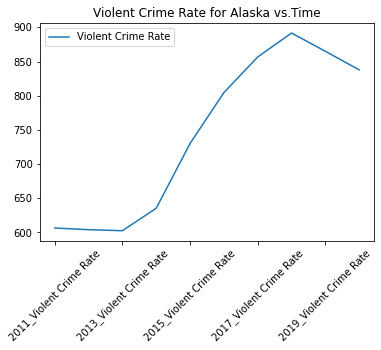

In [77]:
tmp_1.plot()
plt.title('Violent Crime Rate for Alaska vs.Time')
plt.xticks(rotation=45)
plt.show()

# Q6. Which States had crime rates go down in 2020 vs. 2019?

Print the unique values in the State column after you do your subset.

In [78]:
tmp_2=df.iloc[:,0:4]
tmp_2=df[df["2019_Violent Crime Rate"]>df["2020_Violent Crime Rate"]]
print(sorted(tmp_2['State or Territory'].unique()))

['Alabama', 'Alaska', 'California', 'Connecticut', 'Hawaii', 'Indiana', 'Maine', 'Maryland', 'Massachusetts', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'Oregon', 'Vermont', 'Virginia', 'Washington']


# Q7. Compute the raw change between 2020 and 2019 for all States and print summary statistics.
This one should have the raw units of Y - add a text cell and describe what you see in the summary statistics output.

In [79]:
tmp_3=df.loc[:,["State or Territory","2020_Violent Crime Rate","2019_Violent Crime Rate"]]
tmp_3["difference"]=(df["2020_Violent Crime Rate"]-df["2019_Violent Crime Rate"])
tmp_3=tmp_3[["difference"]]

In [80]:
tmp_3.describe()

,difference
count,50.000000
mean,20.454000
std,44.755359
min,-54.500000
25%,-6.375000
50%,17.550000
75%,38.475000
max,207.700000


***25% of the states lie at or below -6.375, which means that 25% of states decreased their crime rate in 2020 to 2019 per 6.375 crimes per 100,000 people. 
On the other hand, 50% of whole states have increased their crime rate by 17.55 per 100,000 people, and 75% of states have increased the crime rate by 38.475 per 100,000 people.***

# Q8. Make a nice boxplot or histogram for the output from Q7.

Add nice labels and titles and a fun color for your boxplot.

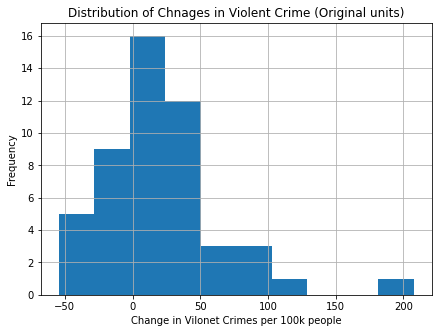

In [81]:
tmp_3.hist(figsize=(7,5))
plt.title("Distribution of Chnages in Violent Crime (Original units)")
plt.xlabel("Change in Vilonet Crimes per 100k people")
plt.ylabel("Frequency")
plt.show()

# Q9. Compute the percentage change between 2020 and 2019 for all States and print summary statistics

This one should be a percentage, of course! Don't forget to multiply by 100. The denominator should be 2019.

In [82]:
tmp_4=df.loc[:,["State or Territory","2020_Violent Crime Rate","2019_Violent Crime Rate"]]
tmp_4["difference"]=(df["2020_Violent Crime Rate"]-df["2019_Violent Crime Rate"])
tmp_4["difference rate"]=tmp_4["difference"]/tmp_4["2019_Violent Crime Rate"]*100
tmp_4=tmp_4[["difference rate"]]
tmp_4.describe()

,difference rate
count,50.000000
mean,5.415681
std,11.120359
min,-16.312741
25%,-2.764665
50%,4.566601
75%,10.552274
max,46.454932


# Q10. Make a nice boxplot or histogram for the output from Q9.

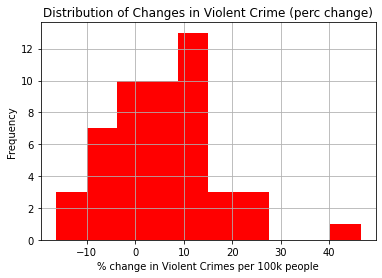

In [83]:
tmp_4.hist(color='red')
plt.title("Distribution of Changes in Violent Crime (perc change)")
plt.ylabel("Frequency")
plt.xlabel("% change in Violent Crimes per 100k people")
plt.show()